In [1]:
from scipy.integrate import odeint
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
%matplotlib notebook

## Krttika Assignment 2
### Solving the given system of equations for three body problem with `Euler-Richarson` method

In [4]:
mu1=7.19 * (10**-4)
x0_0=-1
x1_0=0
x2_0=0
x3_0=0
S_0L3=(x0_0,x1_0,x2_0,x3_0)
S_0L4=(mu1-0.5,0,0.865,0)
S_0L5=(mu1-0.5,0,-0.865,0)
S_0L1=(0.5,0,0,0)
S_0L2=(1.1,0,0,0)
x1,y1,x2,y2=-mu1,0,1-mu1,0


def acx(x0,x2,x3,mu):
    return 2*x3 + x0 -(((1- mu)*(x0 + mu))/(np.sqrt( (x0+ mu)**2 + (x2)**2))**3) - ((mu*(x0-1+mu))/(np.sqrt( ( x0 - 1 +mu)**2 + (x2)**2))**3)

def acy(x0,x1,x2,mu):
    return -2*x1 + x2 - ((1-mu)*x2/(np.sqrt( (x0+ mu)**2 + (x2)**2))**3) - ((mu*x2)/(np.sqrt( ( x0 - 1 +mu)**2 + (x2)**2)**3))


def EulerRichardson1(S,h,i,ts,mu):
    Vex=[]
    X=[]
    Vey=[]
    Y=[]
    Xmid=[]
    Ymid=[]
    Vexmid=[]
    acxmid=[]
    Veymid=[]
    acymid=[]
    acx1=[]
    acy1=[]
    
    t=np.linspace(0,ts,i)
    for j in range(i):
        if(j==0):
            acx1.append(acx(S[0],S[2],S[3],mu))
            acy1.append(acy(S[0],S[1],S[2],mu))
            X.append(S[0])
            Y.append(S[2])
            Vex.append(S[1])
            Vey.append(S[3])
            Xmid.append(S[0] + Vex[0]*h*0.5)
            Ymid.append(S[2] + Vey[0]*h*0.5)
            Vexmid.append(Vex[0] + acx1[0]*h*0.5)
            Veymid.append(Vey[0] + acy1[0]*h*0.5)
            acxmid.append(acx(Xmid[0],Ymid[0],Veymid[0],mu))
            acymid.append(acy(Xmid[0],Vexmid[0],Ymid[0],mu))
        else:
            X.append(X[j-1] + Vexmid[j-1]*h)
            Y.append(Y[j-1] + Veymid[j-1]*h)
            Vex.append(Vex[j-1] + acxmid[j-1]*h)
            Vey.append(Vey[j-1] + acymid[j-1]*h)
            Xmid.append(X[j] + Vex[j]*h*0.5)
            Ymid.append(Y[j] + Vey[j]*h*0.5)
            acx1.append(acx(X[j],Y[j],Vey[j],mu))
            acy1.append(acy(X[j],Vex[j],Y[j],mu))
            Vexmid.append(Vex[j] + acx1[j]*h*0.5)
            Veymid.append(Vey[j] + acy1[j]*h*0.5)
            acxmid.append(acx(Xmid[j],Ymid[j],Veymid[j],mu))
            acymid.append(acy(Xmid[j],Vexmid[j],Ymid[j],mu))
            
    return X,Y

#### Plot and Animation for the trajectory of the smaller mass from point `L4`

In [34]:
XL4,YL4=EulerRichardson1(S_0L4,0.1,20000,1000,mu1)

<IPython.core.display.Javascript object>


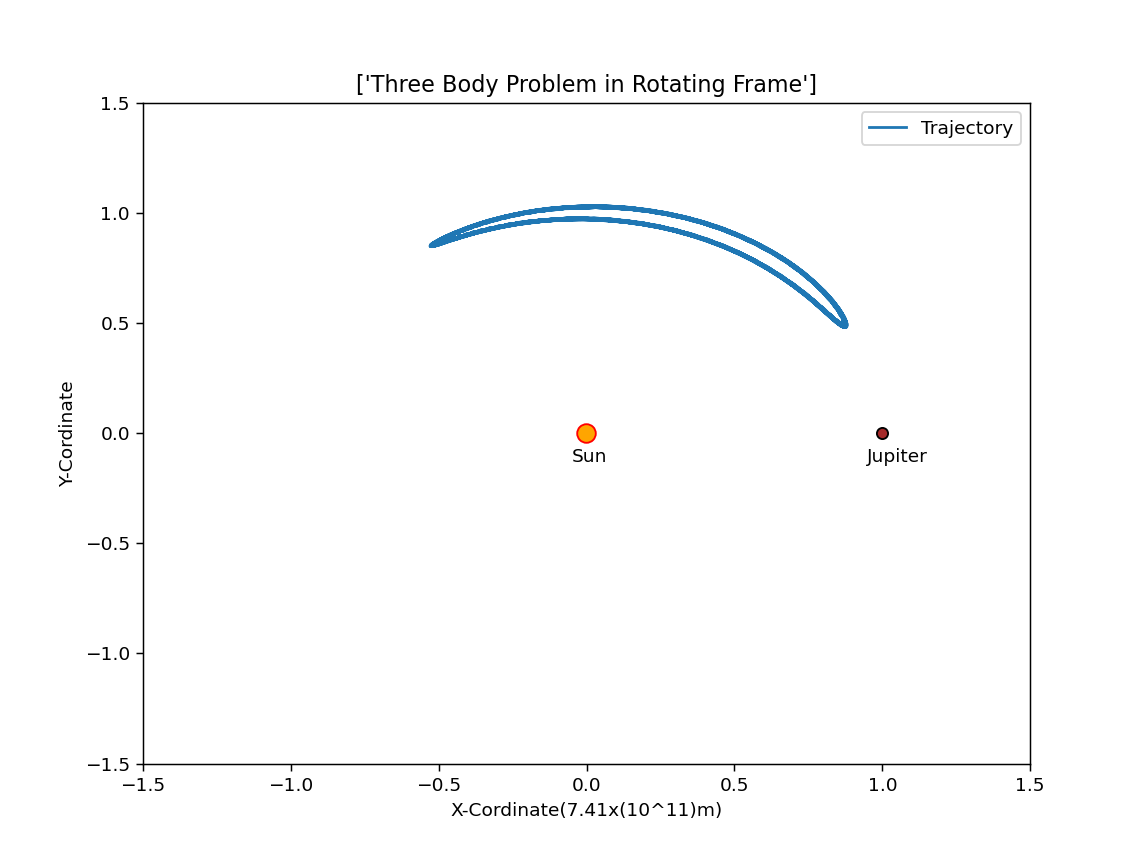

(-1.5, 1.5)

In [37]:
plt.plot(XL4[0::10],YL4[0::10])
plt.plot(x1,y1,marker='o',markersize=10,markeredgecolor='red',markerfacecolor='orange')
plt.plot(x2,y2,marker='o',markersize=6,markerfacecolor='brown',markeredgecolor='black')
plt.title(['Three Body Problem in Rotating Frame'])
plt.legend(['Trajectory'])
plt.xlabel('X-Cordinate(7.41x(10^11)m)')
plt.ylabel('Y-Cordinate')
plt.text(mu1-0.05,-0.13,'Sun',fontsize=10)
plt.text(1-mu1-0.05,-0.13,'Jupiter',fontsize=10)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)

<IPython.core.display.Javascript object>


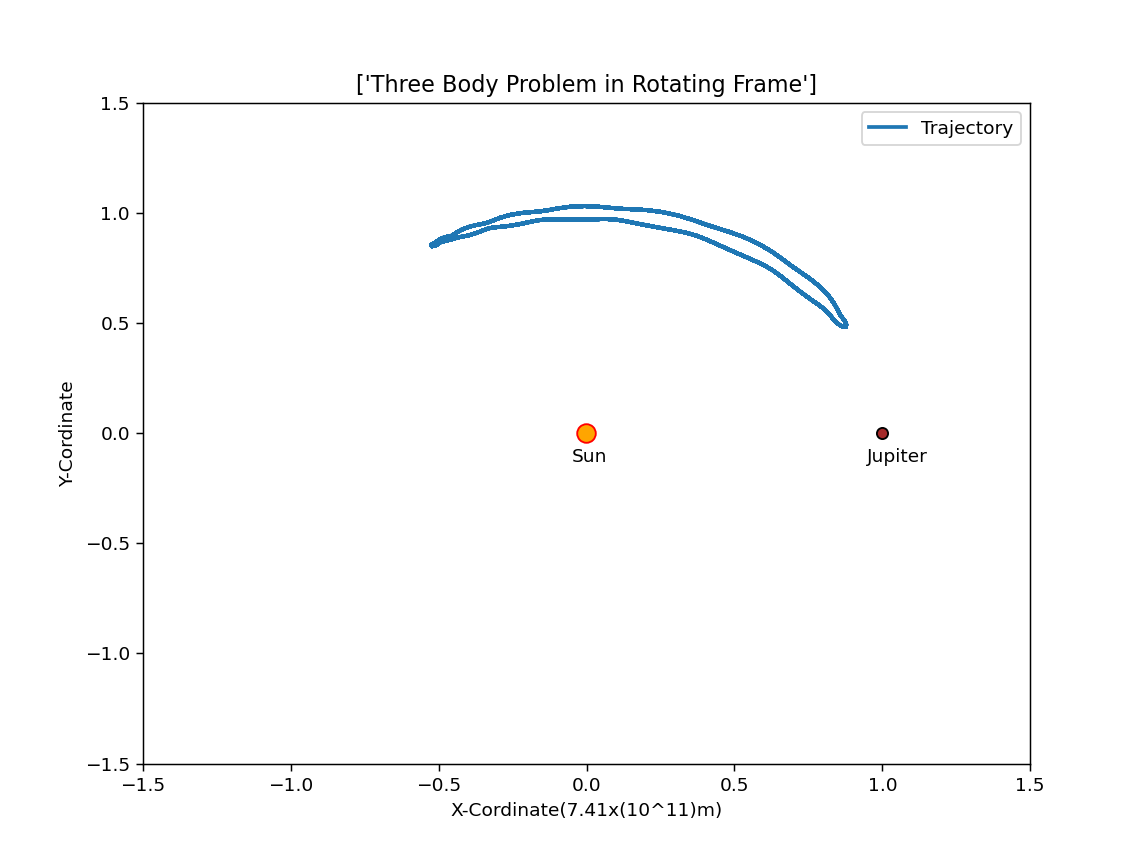

In [40]:
fig = plt.figure()
ax = plt.axes(xlim=(-1.5,1.5), ylim=(-1.5, 1.5))
line, = ax.plot([], [],lw=2)

def init():
    line.set_data([], [])
    return line,
x=[]
y=[]
def animate(i):
    x.append(XL4[10*i])
    y.append(YL4[10*i])
    line.set_data(x, y)
    line.set_markersize(ms)
    #text.set_text('Time={:.2f} Years'.format(i*tt))
    #text=plt.text(0,0,'')

    return line,

anim = animation.FuncAnimation(fig, animate,init_func=init,
                               frames=100, interval=10, blit=True)



plt.plot(x1,y1,marker='o',markersize=10,markeredgecolor='red',markerfacecolor='orange')
plt.plot(x2,y2,marker='o',markersize=6,markerfacecolor='brown',markeredgecolor='black')
plt.title(['Three Body Problem in Rotating Frame'])
plt.legend(['Trajectory'])
plt.xlabel('X-Cordinate(7.41x(10^11)m)')
plt.ylabel('Y-Cordinate')
plt.text(mu1-0.05,-0.13,'Sun',fontsize=10)
plt.text(1-mu1-0.05,-0.13,'Jupiter',fontsize=10)
plt.show()

#### Plot and Animation for the trajectory of the smaller mass from point `L3`

<IPython.core.display.Javascript object>


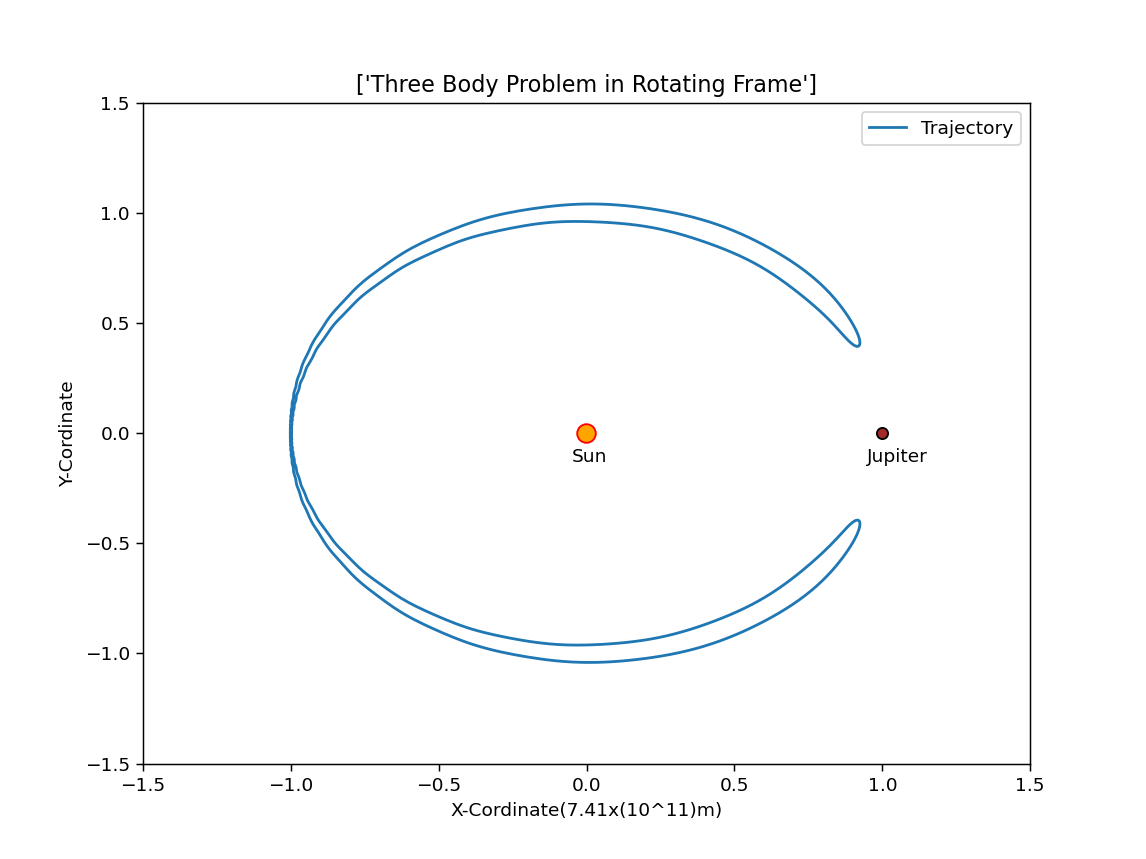

(-1.5, 1.5)

In [36]:
XL3,YL3=EulerRichardson1(S_0L3,0.01,50000,5000,mu1)
plt.plot(XL3[0::45],YL3[0::45])
plt.plot(x1,y1,marker='o',markersize=10,markeredgecolor='red',markerfacecolor='orange')
plt.plot(x2,y2,marker='o',markersize=6,markerfacecolor='brown',markeredgecolor='black')
plt.title(['Three Body Problem in Rotating Frame'])
plt.legend(['Trajectory'])
plt.xlabel('X-Cordinate(7.41x(10^11)m)')
plt.ylabel('Y-Cordinate')
plt.text(mu1-0.05,-0.13,'Sun',fontsize=10)
plt.text(1-mu1-0.05,-0.13,'Jupiter',fontsize=10)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)

<IPython.core.display.Javascript object>


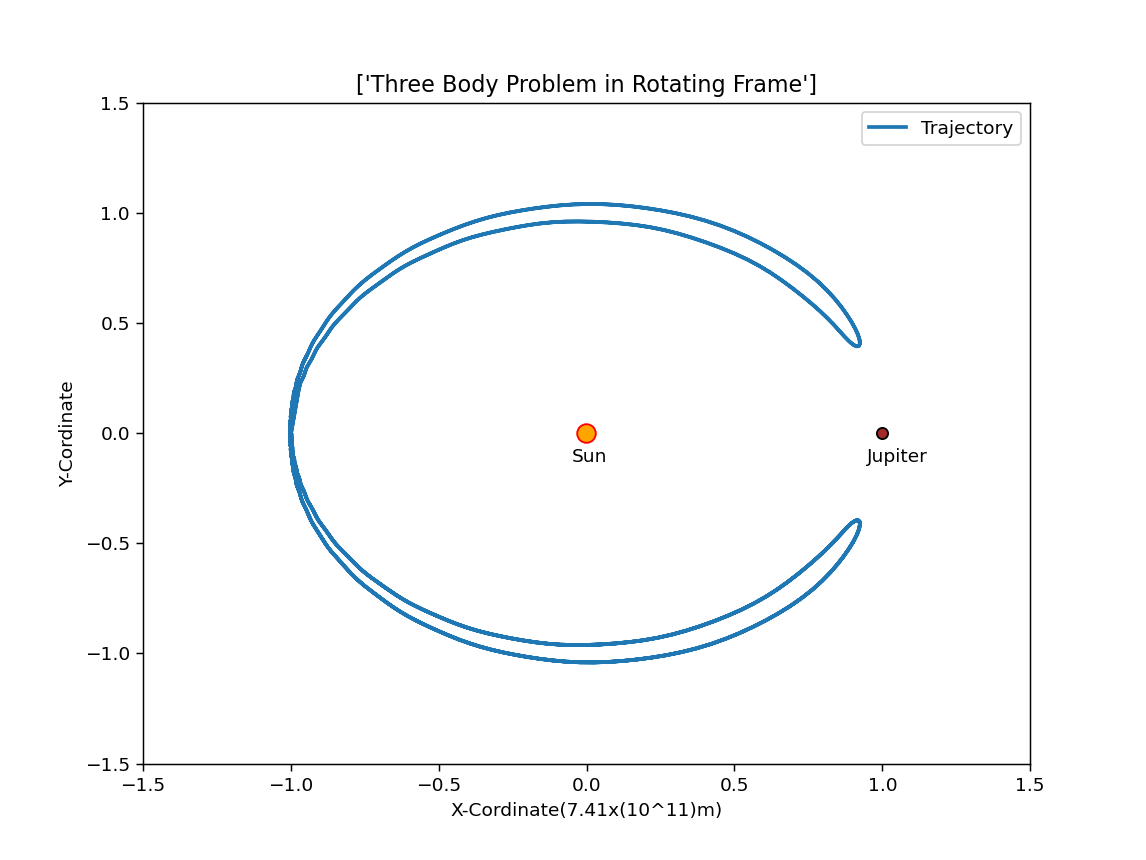

In [45]:
fig = plt.figure()
ax = plt.axes(xlim=(-1.5,1.5), ylim=(-1.5, 1.5))
line, = ax.plot([], [],lw=2)

def init():
    line.set_data([], [])
    return line,
x=[]
y=[]
def animate(i):
    x.append(XL3[80*i])
    y.append(YL3[80*i])
    line.set_data(x, y)
    line.set_markersize(ms)
    #text.set_text('Time={:.2f} Years'.format(i*tt))
    #text=plt.text(0,0,'')

    return line,

anim = animation.FuncAnimation(fig, animate,init_func=init,
                               frames=550, interval=10, blit=True)



plt.plot(x1,y1,marker='o',markersize=10,markeredgecolor='red',markerfacecolor='orange')
plt.plot(x2,y2,marker='o',markersize=6,markerfacecolor='brown',markeredgecolor='black')
plt.title(['Three Body Problem in Rotating Frame'])
plt.legend(['Trajectory'])
plt.xlabel('X-Cordinate(7.41x(10^11)m)')
plt.ylabel('Y-Cordinate')
plt.text(mu1-0.05,-0.13,'Sun',fontsize=10)
plt.text(1-mu1-0.05,-0.13,'Jupiter',fontsize=10)
plt.show()

#### Plot and Animation for the trajectory of the smaller mass from point `L5`

<IPython.core.display.Javascript object>


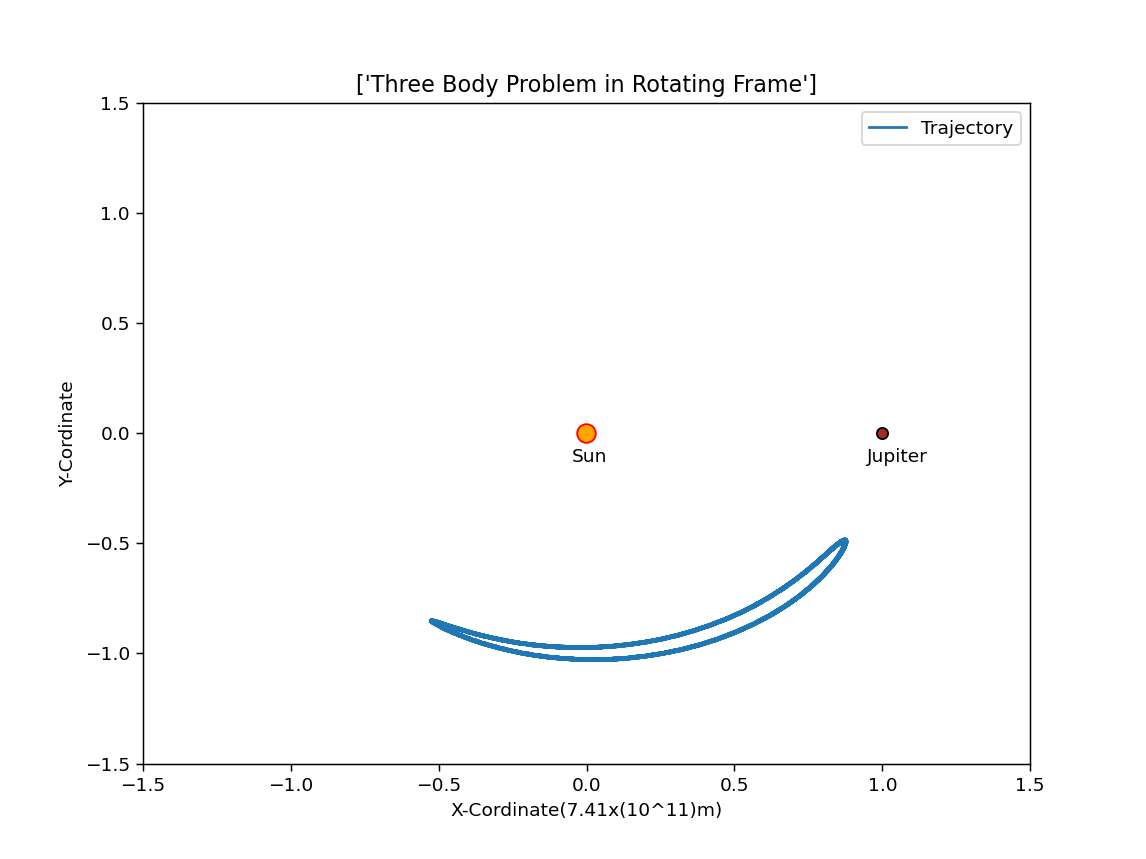

(-1.5, 1.5)

In [46]:
XL5,YL5=EulerRichardson1(S_0L5,0.1,20000,1000,mu1)
plt.plot(XL5[0::10],YL5[0::10])
plt.plot(x1,y1,marker='o',markersize=10,markeredgecolor='red',markerfacecolor='orange')
plt.plot(x2,y2,marker='o',markersize=6,markerfacecolor='brown',markeredgecolor='black')
plt.title(['Three Body Problem in Rotating Frame'])
plt.legend(['Trajectory'])
plt.xlabel('X-Cordinate(7.41x(10^11)m)')
plt.ylabel('Y-Cordinate')
plt.text(mu1-0.05,-0.13,'Sun',fontsize=10)
plt.text(1-mu1-0.05,-0.13,'Jupiter',fontsize=10)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)

<IPython.core.display.Javascript object>


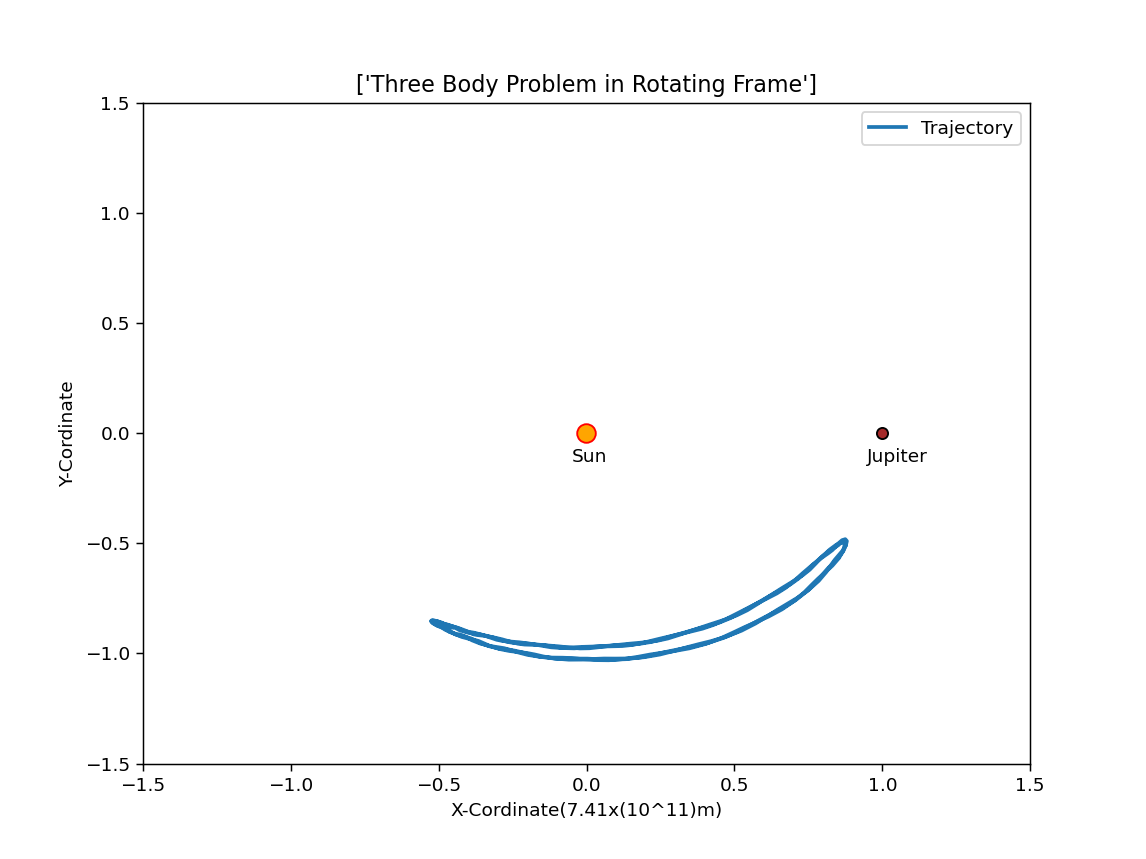

In [52]:

fig = plt.figure()
ax = plt.axes(xlim=(-1.5,1.5), ylim=(-1.5, 1.5))
line, = ax.plot([], [],lw=2)

def init():
    line.set_data([], [])
    return line,
x=[]
y=[]
def animate(i):
    x.append(XL5[10*i])
    y.append(YL5[10*i])
    line.set_data(x, y)
    line.set_markersize(ms)
    #text.set_text('Time={:.2f} Years'.format(i*tt))
    #text=plt.text(0,0,'')

    return line,

anim = animation.FuncAnimation(fig, animate,init_func=init,
                               frames=500, interval=10, blit=True)



plt.plot(x1,y1,marker='o',markersize=10,markeredgecolor='red',markerfacecolor='orange')
plt.plot(x2,y2,marker='o',markersize=6,markerfacecolor='brown',markeredgecolor='black')
plt.title(['Three Body Problem in Rotating Frame'])
plt.legend(['Trajectory'])
plt.xlabel('X-Cordinate(7.41x(10^11)m)')
plt.ylabel('Y-Cordinate')
plt.text(mu1-0.05,-0.13,'Sun',fontsize=10)
plt.text(1-mu1-0.05,-0.13,'Jupiter',fontsize=10)
plt.show()

### For small values of mu system becomes very chaotic as stability of the lagrenge points depletes 
#### Example:` Earth Moon system`

<IPython.core.display.Javascript object>


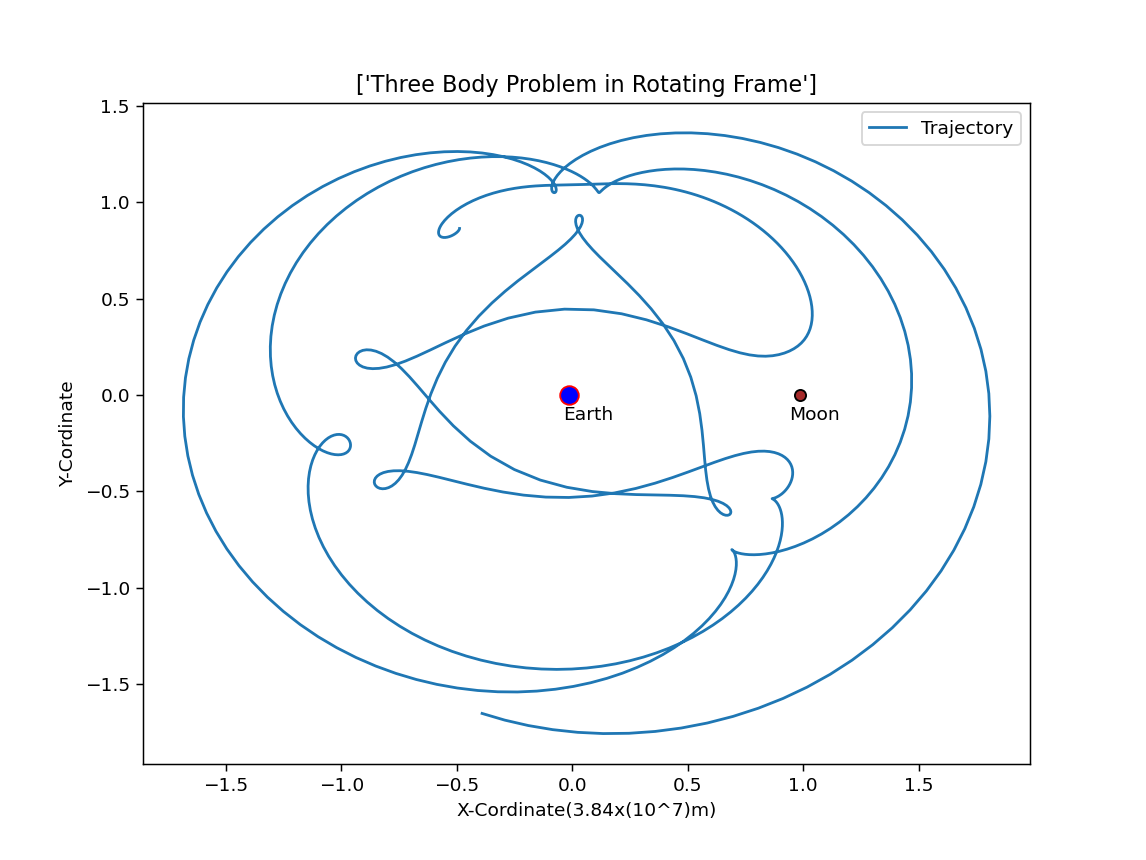

Text(0.938, -0.13, 'Moon')

In [60]:
mu2=0.012
x11,y11,x22,y22=-mu2,0,1-mu2,0
S_0ME=(mu2-0.5,0,0.865,0)
Xm,Ym=EulerRichardson1(S_0ME,0.01,8000,1000,mu2)
plt.plot(Xm[0::10],Ym[0::10])
plt.plot(x11,y11,marker='o',markersize=10,markeredgecolor='red',markerfacecolor='Blue')
plt.plot(x22,y22,marker='o',markersize=6,markerfacecolor='brown',markeredgecolor='black')
plt.title(['Three Body Problem in Rotating Frame'])
plt.legend(['Trajectory'])
plt.xlabel('X-Cordinate(3.84x(10^7)m)')
plt.ylabel('Y-Cordinate')
plt.text(mu2-0.05,-0.13,'Earth',fontsize=10)
plt.text(1-mu2-0.05,-0.13,'Moon',fontsize=10)